# A quick look at the hypergeometric distribution

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

In [2]:
plt.style.use("seaborn")
sns.set_context("talk", font_scale=1.4)
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
x, T, G, N = 39, 1641, 74, 257

**Note:** the Scipy and R calling conventions are different. If we use the above values as the ones we'd use to call R's `phyper` function directly (see below) then we need to convert them to the Scipy convention as follows:

In [4]:
M, n = T+G, G

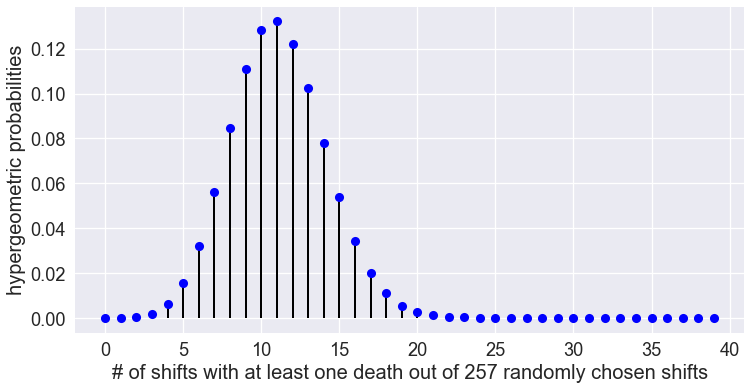

In [5]:
rv_null = st.hypergeom(M, n, N)
x_null = np.arange(0, 40)
pmf_null = rv_null.pmf(x_null)

fig, ax = plt.subplots()
ax.plot(x_null, pmf_null, 'bo')
ax.vlines(x_null, 0, pmf_null, lw=2)
ax.set_xlabel('# of shifts with at least one death out of 257 randomly chosen shifts')
ax.set_ylabel('hypergeometric probabilities');

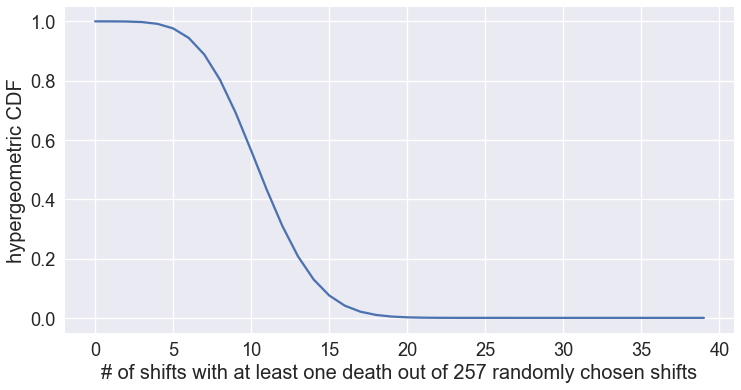

In [6]:
cdf_null = rv_null.sf(x_null)

fig, ax = plt.subplots()
ax.plot(x_null, cdf_null)
#ax.vlines(x_null, 0, cdf_null, lw=2)
ax.set_xlabel('# of shifts with at least one death out of 257 randomly chosen shifts')
ax.set_ylabel('hypergeometric CDF');

In [7]:
st.hypergeom.cdf(x, M, n, N)

0.99999999999806988

In [8]:
st.hypergeom.sf(x, M, n, N)

9.1121622071405691e-16

In [9]:
%load_ext rpy2.ipython

In [10]:
%%R -i x,M,n,N
cat("x, M, n, N:", x, M, n, N, "\n")
cat("cdf:", phyper(x, n, M-n, N, lower.tail=TRUE), "\n")
cat("sf :", phyper(x, n, M-n, N, lower.tail=FALSE))

x, M, n, N: 39 1715 74 257 
cdf: 1 
sf : 9.112162e-16

In [15]:
%%R -i x,M,n,N
cat("x, M, n, N:", x, M, n, N, "\n")
cdf <- phyper(x, n, M-n, N, lower.tail=TRUE)
sf  <- phyper(x, n, M-n, N, lower.tail=FALSE)
cat("cdf:", sprintf("%.18e", cdf), "\n")
cat("sf :", sf, "\n" )
cat("diff:", cdf-sf )

x, M, n, N: 39 1715 74 257 
cdf: 9.999999999999991118e-01 
sf : 9.112162e-16 
diff: 1

# A bug in scipy

Note that for these values:

```python
x, M, n, N = 40, 1600, 50, 300
```

Scipy's `logcdf` function [returns non-sensical results](https://github.com/scipy/scipy/issues/8692):

In [101]:
x, M, n, N = 40, 1600, 50, 300
lcdf = st.hypergeom.logcdf(x, M, n, N)
print("logcdf:", lcdf)
print("probab:", repr(np.exp(lcdf)))

logcdf: 7.57838236609e-13
probab: 1.0000000000007578


As a sanity check, let's look at R, which does the right thing:

In [65]:
%%R -i x,M,n,N -o lcdf
lcdf <- phyper(x, n, M-n, N, lower.tail=TRUE, log=TRUE)
cat("logcdf:", sprintf("%.12e", lcdf), "\n")
cat("probab:", exp(lcdf))

logcdf: -7.565148879229e-23 
probab: 1

This is probably obvious for some reason, but not immediately to me... At these values, the survival function is *minus* the `logcdf` to numerical precision:

In [70]:
%%R -i x,M,n,N
lcdf <- phyper(x, n, M-n, N, lower.tail=TRUE, log=TRUE)
sf <- phyper(x, n, M-n, N, lower.tail=FALSE, log=FALSE)

cat("logcdf:", sprintf("%.12e", lcdf), "\n")
cat("sf    : ", sprintf("%.12e", sf), "\n")
cat("diff  :", lcdf - sf)

logcdf: -7.565148879229e-23 
sf    :  7.565148879229e-23 
diff  : -1.51303e-22

## A quick sanity check with less extreme values

This shows that SciPy does agree with R away from the tails.

In [71]:
import numpy as np
import scipy.stats as st

x, M, n, N = 3, 20, 7, 12
lcdf = st.hypergeom.logcdf(x, M, n, N)
print("logcdf:", lcdf)
print("probab:", repr(np.exp(lcdf)))

logcdf: -1.38320316855
probab: 0.25077399380804904


In [72]:
%%R -i x,M,n,N
lcdf <- phyper(x, n, M-n, N, lower.tail=TRUE, log=TRUE)
cat("logcdf:", sprintf("%.12e", lcdf), "\n")
cat("probab:", exp(lcdf))

logcdf: -1.383203168550e+00 
probab: 0.250774